### Import dependencies and read in data

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
url = "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"
penguins = pd.read_csv(url)

We will be using Palmer Penguin Dataset from [github](https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv) for our exploratory data analysis

In [75]:
# Review the first 5 rows of dataframe

penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Data Understanding

In [76]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [77]:
# View the shape of the dataframe

penguins.shape

(344, 9)

In [78]:
# Check the number of unique values in the dataframe 

for col in penguins.columns:
    print(col, len(penguins[col].unique())) # penguins[col].unique()

rowid 344
species 3
island 3
bill_length_mm 165
bill_depth_mm 81
flipper_length_mm 56
body_mass_g 95
sex 3
year 3


In [79]:
# Summarize table using .describe method

penguins.describe(include="all")

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


### Data Cleaning

In [80]:
# View all the rows within null values

penguins[penguins.sex.isna()]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [81]:
# Check for the number null values

penguins.sex.isna().sum()

11

In [82]:
# Remove all null values from dataframe

penguins = penguins.dropna().reset_index()

In [83]:
penguins.duplicated().sum()

0

In [84]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              333 non-null    int64  
 1   rowid              333 non-null    int64  
 2   species            333 non-null    object 
 3   island             333 non-null    object 
 4   bill_length_mm     333 non-null    float64
 5   bill_depth_mm      333 non-null    float64
 6   flipper_length_mm  333 non-null    float64
 7   body_mass_g        333 non-null    float64
 8   sex                333 non-null    object 
 9   year               333 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 26.1+ KB


In [85]:
penguins.dtypes

index                  int64
rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [86]:
penguins.describe(include="all")

,index,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,NaN,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,173.324324,174.324324,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,98.386547,98.386547,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,0.000000,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,89.000000,90.000000,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.000000,173.000000,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.000000,259.000000,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Data visualization

In [87]:
penguins.head()

,index,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [88]:
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [89]:
round(penguins.species.value_counts()/len(penguins.species) * 100, 2)

Adelie       43.84
Gentoo       35.74
Chinstrap    20.42
Name: species, dtype: float64

In [90]:
round(penguins.sex.value_counts()/len(penguins.sex) * 100, 2)

male      50.45
female    49.55
Name: sex, dtype: float64

In [91]:
flipper_len_Adelie = penguins.flipper_length_mm[penguins.species == "Adelie"]
flipper_len_Gentoo = penguins.flipper_length_mm[penguins.species == "Gentoo"]
flipper_len_Chinstrap = penguins.flipper_length_mm[penguins.species == "Chinstrap"]

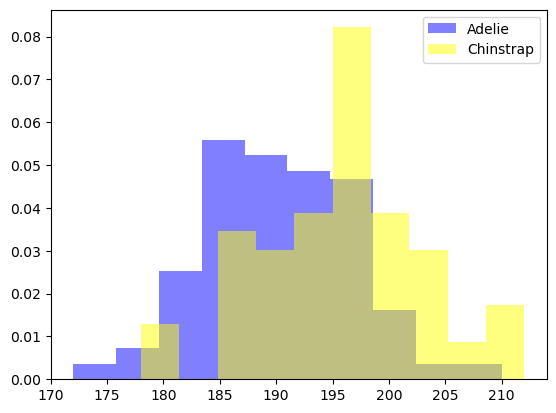

In [92]:
plt.hist(flipper_len_Adelie, color="blue", label="Adelie", density=True, alpha=0.5)
#plt.hist(flipper_len_Gentoo, color="red", label="Gentoo", density=True, alpha=0.5)
plt.hist(flipper_len_Chinstrap, color="yellow", label="Chinstrap", density=True, alpha=0.5)
plt.legend()
plt.show()

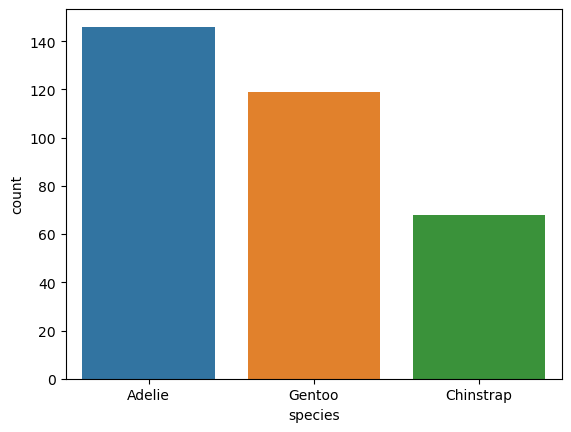

In [93]:
sns.countplot(x='species', data=penguins)
plt.show()

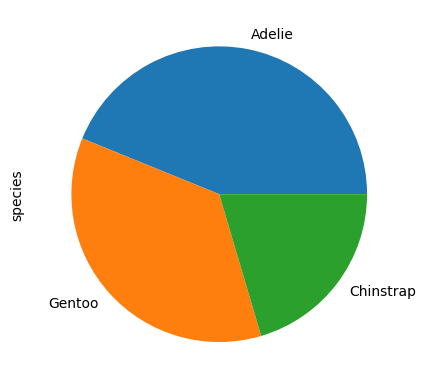

In [94]:
penguins.species.value_counts().plot.pie()
plt.show()

In [95]:
import plotly.express as px
fig = px.box(penguins, x="species", y="body_mass_g", color="species", title="Penguin Body Mass (Grams) by Species")
fig.show()

In [96]:
fig = px.box(penguins, x="species", y="flipper_length_mm", color="species", title="Penguin Flipper Length (MM) by Species")
fig.show()

In [97]:
fig = px.box(penguins, x="species", y="bill_length_mm", color="species", title="Penguin Bill Length (MM) by Species")
fig.show()

In [98]:
fig = px.box(penguins, x="island", y="bill_depth_mm", color="species")
fig.show()

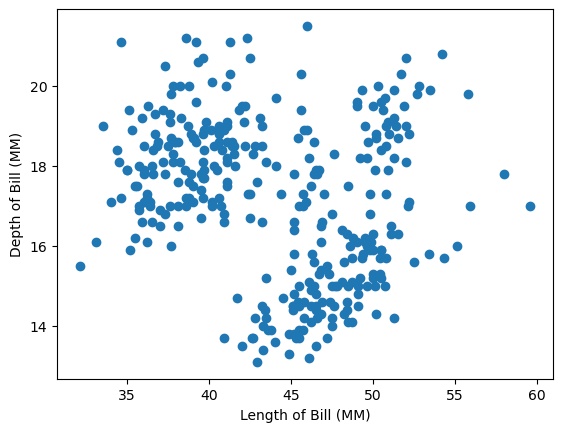

In [99]:
plt.scatter(x=penguins.bill_length_mm, y=penguins.bill_depth_mm)
plt.xlabel("Length of Bill (MM)")
plt.ylabel("Depth of Bill (MM)")
plt.show()

In [100]:
penguins.bill_length_mm.corr(penguins.bill_depth_mm)

-0.22862563591302895

In [101]:
penguins[["bill_length_mm", "bill_depth_mm"]].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.228626
bill_depth_mm,-0.228626,1.000000


In [102]:
np.cov(penguins.bill_length_mm, penguins.bill_depth_mm)

array([[29.90633344, -2.46209134],
       [-2.46209134,  3.87788831]])

In [103]:
from scipy.stats import pearsonr

In [104]:
corr_length_depth, p = pearsonr(penguins.bill_length_mm, penguins.bill_depth_mm)
corr_length_depth

-0.2286256359130291

In [105]:
penguins.bill_length_mm.cov(penguins.bill_depth_mm)

-2.462091338326278

In [106]:
mean_mass_adelie = round(penguins.body_mass_g[penguins["species"] == "Adelie"].mean(), 4)
print("The mean body mass of the Adelie penguin is:" )
print(str(mean_mass_adelie) + " Grams")

The mean body mass of the Adelie penguin is:
3706.1644 Grams


In [107]:
mean_mass_gentoo = round(penguins.body_mass_g[penguins['species'] == "Gentoo"].mean(), 4)
print("The mean body mass of the Gentoo penguin is:" )
print(str(mean_mass_gentoo) + " Grams")

The mean body mass of the Gentoo penguin is:
5092.437 Grams


In [108]:
mean_mass_chinstrap = round(penguins.body_mass_g[penguins['species'] == "Chinstrap"].mean(), 4)
print("The mean body mass of the Chinstrap penguin is:" )
print(str(mean_mass_chinstrap) + " Grams")

The mean body mass of the Chinstrap penguin is:
3733.0882 Grams
